# Tutorial 5 (a)
## Basics of Time Series Analysis

In [1]:
# import the libraries
import warnings
warnings.filterwarnings('ignore') # We can suppress the warnings

### Load the Dataset

In [2]:
import pandas as pd

# read the file (AirPassengers.csv) and store in the dataframe
air_passengers = pd.read_csv("AirPassengers.csv", header = 0, parse_dates = [0], 
                             names = ['Month', 'Passengers'], index_col = 0)

# The resulting DataFrame df will have the "Date" column parsed as datetime objects, which allows you to perform datetime 
# operations on that column. For instance, you can filter data by date ranges or extract specific date components.

# Display first 5 records
air_passengers.head(30)

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
1949-06-01,135
1949-07-01,148
1949-08-01,148
1949-09-01,136


In [5]:
# Display the number of passengers from January 1949 to February 1949
air_passengers['1950-01-05':'1951-02-17']

,Passengers
Month,
1950-02-01,126
1950-03-01,141
1950-04-01,135
1950-05-01,125
1950-06-01,149
1950-07-01,170
1950-08-01,170
1950-09-01,158
1950-10-01,133


<Axes: xlabel='Month'>

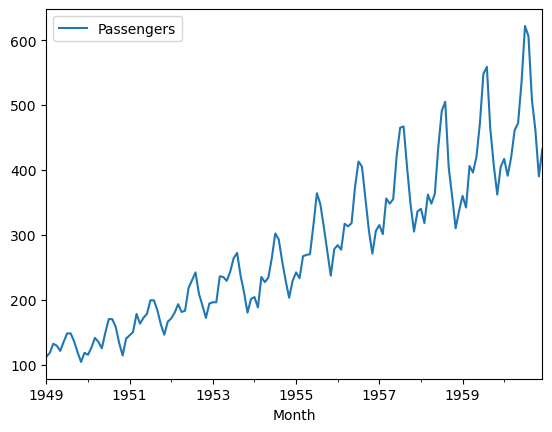

In [6]:
# Plot the data present in the dataframe
air_passengers.plot()

This series is not stationary because there is visible positive trends in the series.

In [7]:
print(air_passengers.columns)

Index(['Passengers'], dtype='object')


<Axes: xlabel='Month'>

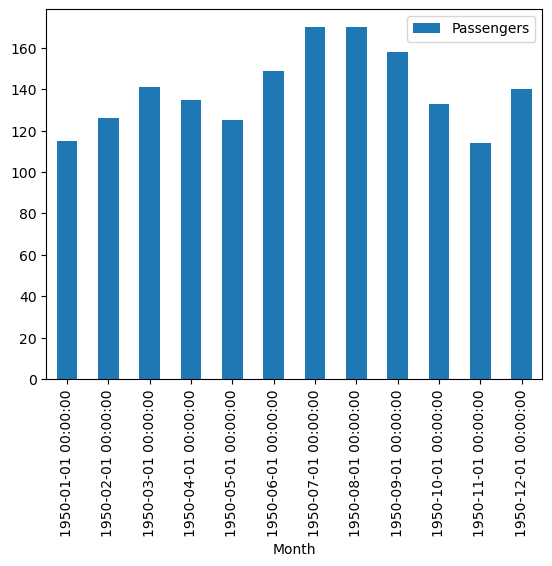

In [8]:
# Plot the bar chart for 1950

year_1950_data = air_passengers.loc['1950']
year_1950_data.plot(kind = 'bar')

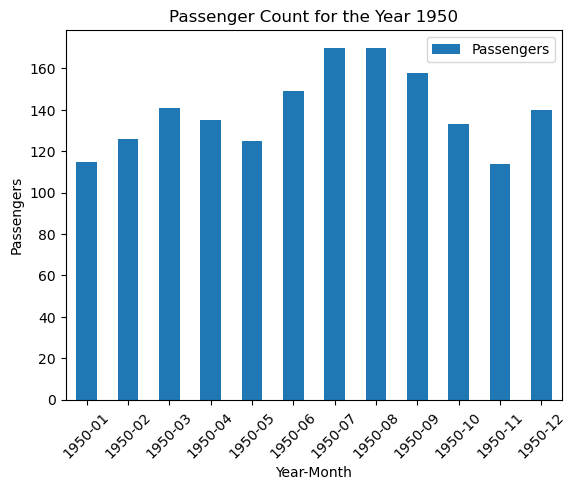

In [9]:
import matplotlib.pyplot as plt

# Extract data for the year 1950
year_1950_data = air_passengers.loc['1950']

# Convert the index to string representation with only year and month
year_1950_data.index = year_1950_data.index.strftime('%Y-%m') # This displays only year and months alone. 

# Plotting
year_1950_data.plot(kind='bar')
plt.xlabel('Year-Month')
plt.ylabel('Passengers')
plt.title('Passenger Count for the Year 1950')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


<Axes: xlabel='Month'>

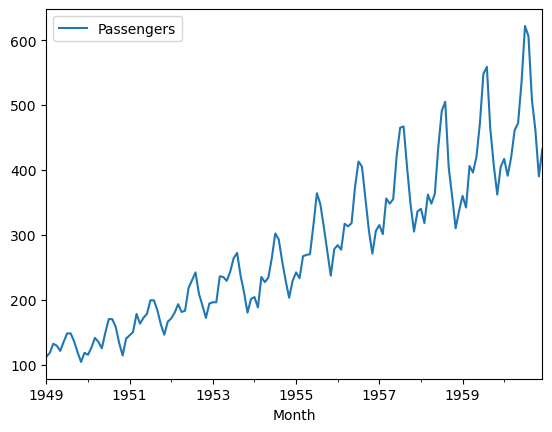

In [11]:
air_passengers.plot()

<Axes: xlabel='Month'>

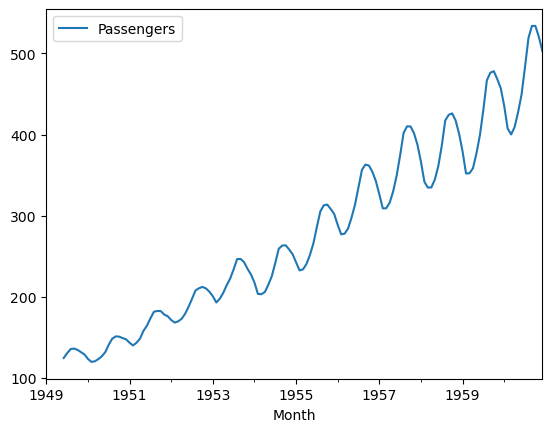

In [10]:
# first test, informally, plot the moving average
# note the ROLLING function
# air_passengers.rolling(window = 60).mean().plot()
air_passengers.rolling(window = 6).mean().plot()

<Axes: xlabel='Month'>

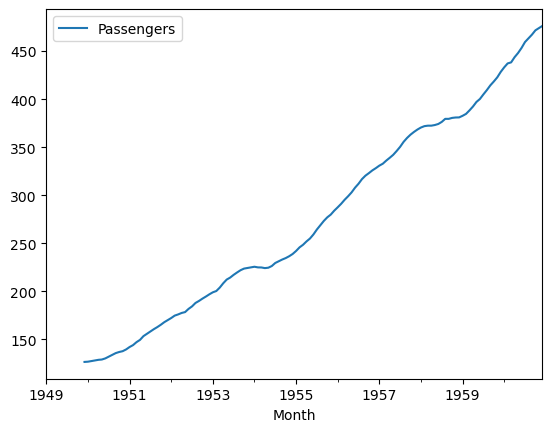

In [12]:
# first test, informally, plot the moving average
# note the ROLLING function
# air_passengers.rolling(window = 60).mean().plot()
air_passengers.rolling(window = 12).mean().plot()

<Axes: xlabel='Month'>

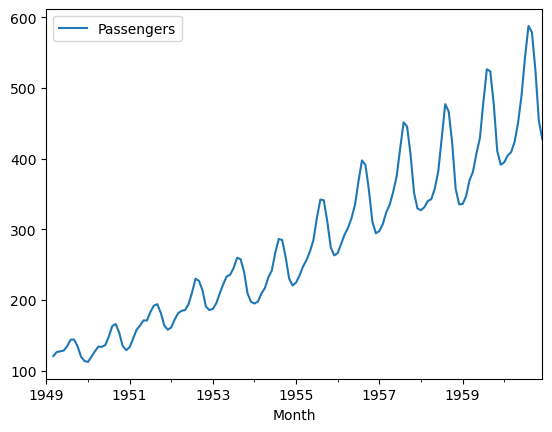

In [13]:
# first test, informally, plot the moving average
# note the ROLLING function
# air_passengers.rolling(window = 60).mean().plot()
air_passengers.rolling(window = 3).mean().plot()

<Axes: xlabel='Month'>

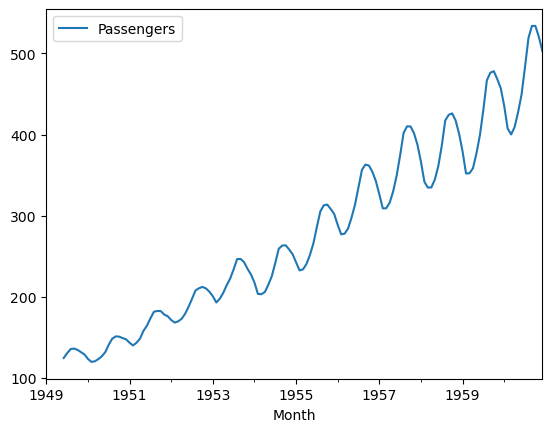

In [21]:
# first test, informally, plot the moving average
# note the ROLLING function
# air_passengers.rolling(window = 60).mean().plot()
air_passengers.rolling(window = 6).mean().plot()     

## How can we see whether the variance changes over time?

<Axes: xlabel='Month'>

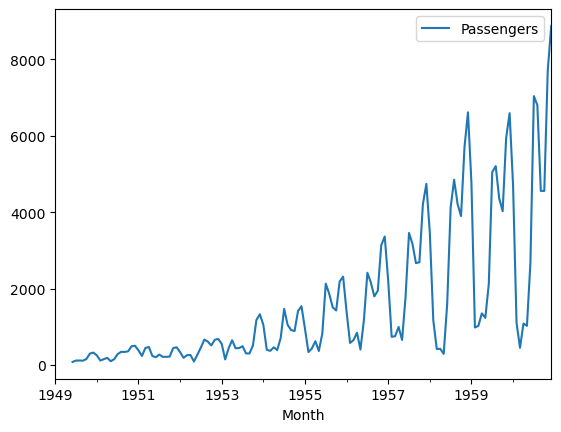

In [22]:
# Can you plot the autocorrelation?
from statsmodels.tsa.stattools import acf

# How should you size your window?
air_passengers.rolling(window = 6).var().plot()

# Window Size: The window parameter specifies the size of the rolling window. In your example, window=60 means that 
# the rolling window will consist of 60 consecutive data points at a time.

<Axes: xlabel='Month'>

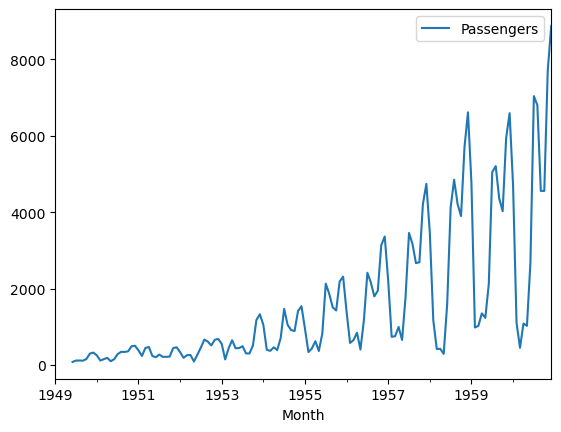

In [24]:
# Can you plot the autocorrelation?
from statsmodels.tsa.stattools import acf

# How should you size your window?
air_passengers.rolling(window = 6).var().plot()

# Window Size: The window parameter specifies the size of the rolling window. In your example, window=60 means that 
# the rolling window will consist of 60 consecutive data points at a time.

## Stationary Time series

<Axes: xlabel='Month'>

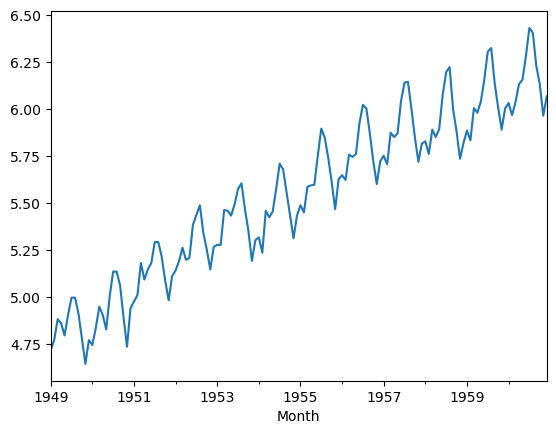

In [25]:
import numpy as np
# One method to get rid of time varying variance is to do a power or log transformation that punishes larger values
# more than smaller values
log_passengers = air_passengers.Passengers.apply(lambda x: np.log(x))
log_passengers.plot()

<Axes: xlabel='Month'>

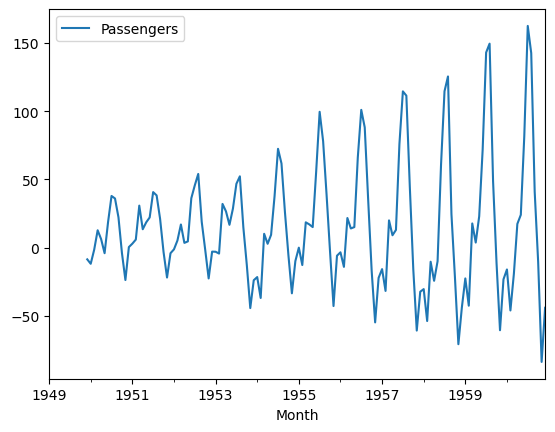

In [26]:
# What if we subtract this rolling mean from the original series?
rolling_mean = air_passengers.rolling(window = 12).mean()

# Subtract rolling_mean from the air_passengers
passengers_detrended = air_passengers - rolling_mean

# Display the plot
passengers_detrended.plot()

<Axes: xlabel='Month'>

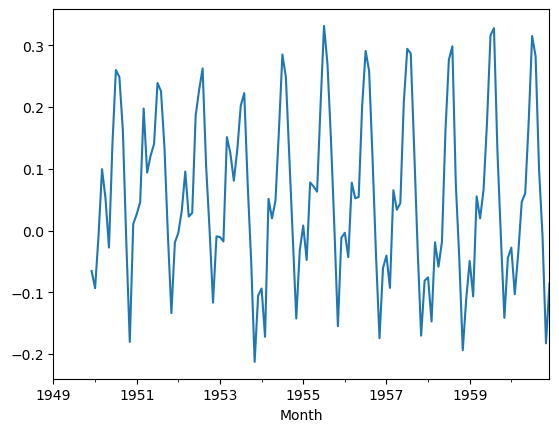

In [27]:
# Exercise: try detrending after taking the log. How does that look?
log_rolling_mean = log_passengers.rolling(window = 12).mean()
log_detrended = log_passengers - log_rolling_mean
log_detrended.plot()

# Seasonality

<Axes: xlabel='Month'>

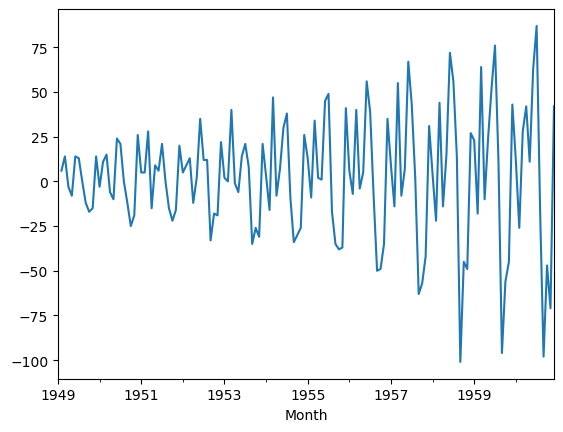

In [28]:
# shift() Shift index by desired number of periods with an optional time `freq`.
# By default It shifts 1 period, check the example details using shift + tab
(air_passengers.Passengers - air_passengers.Passengers.shift()).plot()

<Axes: xlabel='Month'>

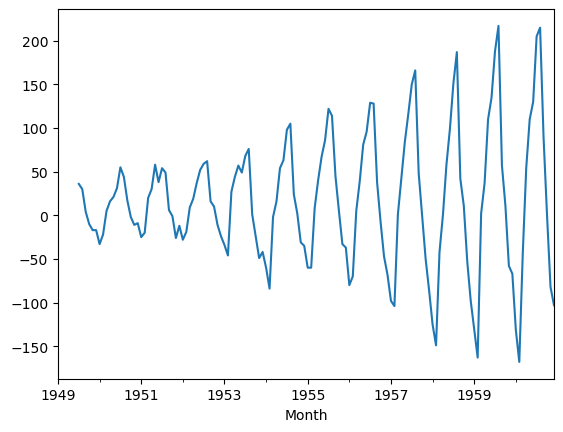

In [31]:
#shift() Shift index by desired number of periods with an optional time `freq`.
# By default It shifts 1 period, check the example details using shift + tab
(air_passengers.Passengers - air_passengers.Passengers.shift(6)).plot()

<Axes: xlabel='Month'>

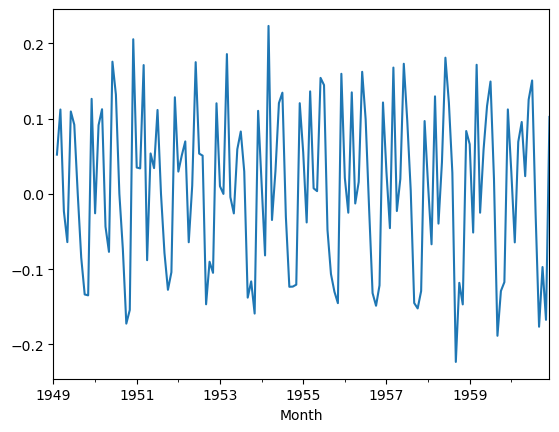

In [32]:
# One common technique is differencing, let's start with log_passengers
log_passengers_diff = log_passengers - log_passengers.shift()
log_passengers_diff.plot()

<Axes: xlabel='Month'>

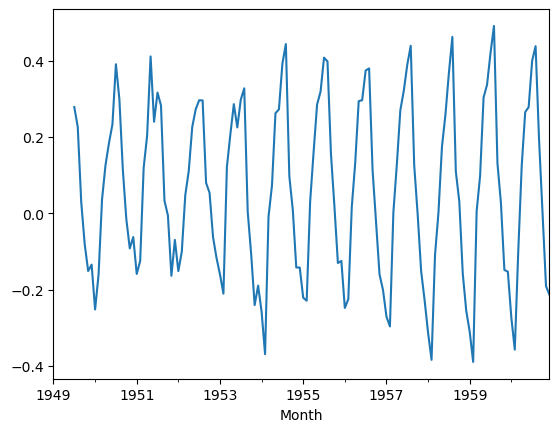

In [33]:
# One common technique is differencing, let's start with log_passengers
log_passengers_diff = log_passengers - log_passengers.shift(6)
log_passengers_diff.plot()

## Time series = Trend + Seasonality + Residuals

    
- **Trend**: general direction of the series (e.g. increasing)
- **Sesonality**: repeating patterns in data (e.g. sales around holidays..)
- **Residuals**: the rest

`statsmodels.tsa.seasonal.seasonal_decompose()` takes a DataFrame and returns an object with attributes:
- `.trend`
- `.seasonal`
- `.resid`
each containing the time series that encodes the corresponding part of the original series, 

and a method
- `.plot()`
which makes 4 plots:  original series + 3 its components

#### Seasonal decompose

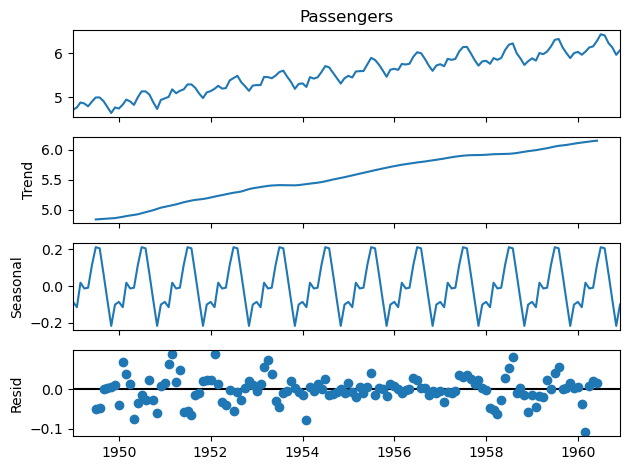

In [34]:
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot
# interpolate() means replacement of values if some data is missed
# log_passengers.interpolate(inplace = True)

log_passengers.interpolate(inplace = True)

# decompose the data using seasonal_decompose() function
decomposition = seasonal_decompose(log_passengers, model = 'additive')

# The additive model is Y[t] = T[t] + S[t] + e[t]

# The multiplicative model is Y[t] = T[t] * S[t] * e[t]

# Plot the function using plot()
decomposition.plot()
pyplot.show()

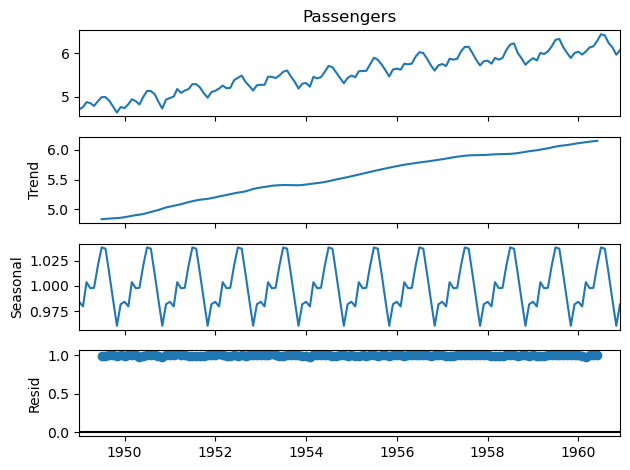

In [35]:
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot
# interpolate() means replacement of values if some data is missed
# log_passengers.interpolate(inplace = True)

log_passengers.interpolate(inplace = True)

# decompose the data using seasonal_decompose() function
decomposition = seasonal_decompose(log_passengers, model = 'multiplicative')

# The additive model is Y[t] = T[t] + S[t] + e[t]

# The multiplicative model is Y[t] = T[t] * S[t] * e[t]

# Plot the function using plot()
decomposition.plot()
pyplot.show()

Time is a combination of Trend, sasonlity or resudial. 
Note: If we have higher residual, the model prediction is not good. 

# Dicky Fuller Test


In [36]:
air_passengers

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [37]:
series = air_passengers['Passengers'].values

In [38]:
from  statsmodels.tsa.stattools import adfuller
result = adfuller(series, autolag = 'AIC')

In [39]:
# Augmented Dickey-Fuller test
ADF_result = adfuller(air_passengers['Passengers'])

# Display the results
print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')

ADF Statistic: 0.8153688792060547
p-value: 0.9918802434376411


In [40]:
# Take the difference (Taken 1 value diffrence)
air_passengers_diff = np.diff(air_passengers['Passengers'], n = 1)

In [41]:
# Augmented Dickey-Fuller test
ADF_result = adfuller(air_passengers_diff)

# Display the results
print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')

ADF Statistic: -2.829266824170004
p-value: 0.05421329028382491


In [42]:
# Take the difference (Taken 1 value diffrence)
air_passengers_diff = np.diff(air_passengers['Passengers'], n = 2)

In [43]:
# Augmented Dickey-Fuller test
ADF_result = adfuller(air_passengers_diff)

# Display the results
print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')

ADF Statistic: -16.38423154246853
p-value: 2.732891850014085e-29


## when: n=
1. first order Explanation of First order 
2. Second Order Differencing

In [44]:
import numpy as np

# Create a simple time series data
data = np.array([10, 15, 12, 18, 22, 20, 25])

# Calculate the first-order difference
first_order_diff = np.diff(data, n=1)

# Calculate the second-order difference
second_order_diff = np.diff(data, n=2)

# Display the original data and differences
print("Original Data:", data)
print("First-Order Difference:", first_order_diff)
print("Second-Order Difference:", second_order_diff)
# Xt−2Xt−1+Xt−2
# 10 - 2 * 15  + 12 = -8

Original Data: [10 15 12 18 22 20 25]
First-Order Difference: [ 5 -3  6  4 -2  5]
Second-Order Difference: [-8  9 -2 -6  7]


In [45]:
import numpy as np

# Create a simple time series data
data = np.array([6,9,13])

# Calculate the first-order difference
first_order_diff = np.diff(data, n=1)

# Calculate the second-order difference
second_order_diff = np.diff(data, n=2)

# Display the original data and differences
print("Original Data:", data)
print("First-Order Difference:", first_order_diff)
print("Second-Order Difference:", second_order_diff)
# Xt−2Xt−1+Xt−2
# 6 - 2 * 9  + 13 = -8

Original Data: [ 6  9 13]
First-Order Difference: [3 4]
Second-Order Difference: [1]


## Autocorrolation

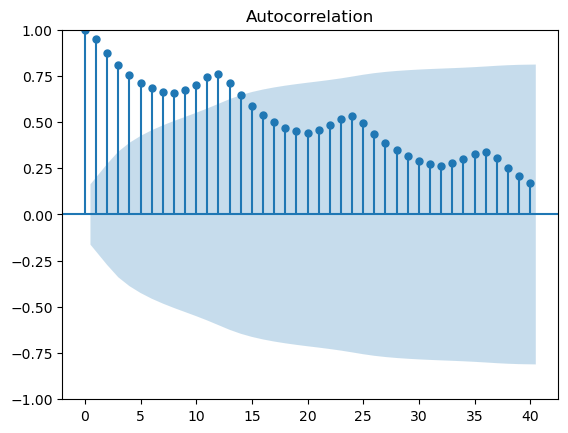

In [46]:
# Import plot_acf
from statsmodels.graphics.tsaplots import plot_acf

# Plot ACF of data_monthly
plot_acf(air_passengers, lags = 40); 

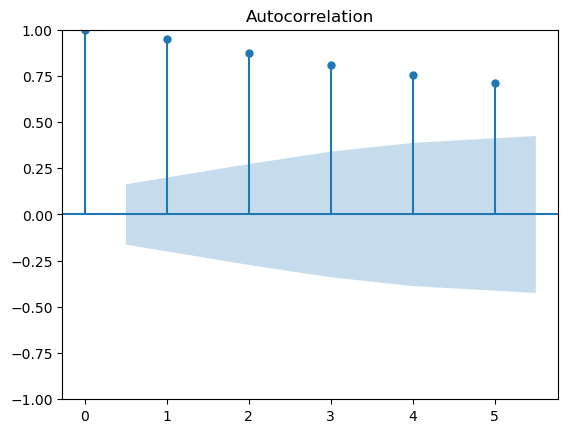

In [47]:
# Import plot_acf
from statsmodels.graphics.tsaplots import plot_acf

# Plot ACF of data_monthly
plot_acf(air_passengers, lags = 5); 

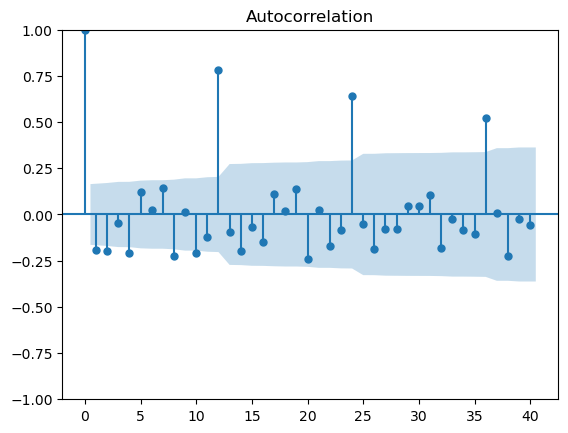

In [49]:
# Import plot_acf
from statsmodels.graphics.tsaplots import plot_acf

# Plot ACF of data_monthly
plot_acf(air_passengers_diff, lags = 40); 

## Reference
- Machine Learning for Time Series Forecasting with Python, Francesca Lazzeri, ISBN: 978-1-119-68236-3 December 2020.